# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [3]:
#create dataframe for city info
cityDF = pd.DataFrame(columns = ["Name", "ID", "Lat", "Lng"])
cityDF["Name"] = cities
cityDF["ID"] = ""
cityDF["Lat"] = ""
cityDF["Lng"] = ""
cityDF["Max Temp"] =""
cityDF["Humidity"]=""
cityDF["Cloudiness"]=""
cityDF["Wind Speed"]=""
cityDF.head()

,Name,ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,vaini,,,,,,,
1,tiarei,,,,,,,
2,tasiilaq,,,,,,,
3,higuey,,,,,,,
4,ola,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
i = 0
for city in cities:
    queryURL = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    citiesResponse = requests.get(queryURL)
    citiesJson = citiesResponse.json()
    
    
    try:
        cityName = citiesJson["name"]
        cityID = citiesJson["id"]
        print(f"City Name: {cityName}. City ID: {cityID}.")
        cityDF.iloc[i,1] = cityID
        cityDF.iloc[i,2] = citiesJson["coord"]["lat"]
        cityDF.iloc[i,3] = citiesJson["coord"]["lon"]
        cityDF.iloc[i,4] = citiesJson["main"]["temp_max"]
        cityDF.iloc[i,5] = citiesJson["main"]["humidity"]
        cityDF.iloc[i,6] = citiesJson["clouds"]["all"]
        cityDF.iloc[i,7] = citiesJson["wind"]["speed"]        

    except (KeyError):
        print("Ruh-Roh, No Data.")
    
    i+=1

City Name: Vaini. City ID: 4032243.
City Name: Tiarei. City ID: 4033356.
City Name: Tasiilaq. City ID: 3424607.
Ruh-Roh, No Data.
City Name: Ola. City ID: 2122574.
City Name: Hong Kong. City ID: 1819729.
City Name: Rikitea. City ID: 4030556.
City Name: Seddon. City ID: 7281807.
City Name: Bethel. City ID: 5282297.
City Name: Busselton. City ID: 2075265.
Ruh-Roh, No Data.
City Name: Upernavik. City ID: 3418910.
City Name: Umuarama. City ID: 3445782.
City Name: Mount Gambier. City ID: 2156643.
City Name: Fulton. City ID: 4196508.
City Name: Katsuura. City ID: 2112309.
City Name: Comodoro Rivadavia. City ID: 3860443.
City Name: Yellowknife. City ID: 6185377.
City Name: Mayo. City ID: 4362001.
City Name: Khatanga. City ID: 2022572.
City Name: Mahebourg. City ID: 934322.
Ruh-Roh, No Data.
City Name: Avarua. City ID: 4035715.
City Name: Hithadhoo. City ID: 1282256.
City Name: Hilo. City ID: 5855927.
City Name: Aden. City ID: 415189.
City Name: Hermanus. City ID: 3366880.
City Name: Inhambane

City Name: Vicuna. City ID: 3868308.
City Name: Kamskiye Polyany. City ID: 553350.
City Name: Sars. City ID: 498501.
City Name: Chapais. City ID: 5919850.
City Name: Bulgan. City ID: 2032201.
Ruh-Roh, No Data.
City Name: Waitati. City ID: 2179825.
City Name: Kibala. City ID: 2425791.
City Name: Bunia. City ID: 217695.
City Name: Christchurch. City ID: 2192362.
City Name: Bubaque. City ID: 2374583.
City Name: Talnakh. City ID: 1490256.
City Name: Shelburne. City ID: 6145890.
Ruh-Roh, No Data.
City Name: Ukiah. City ID: 5404476.
City Name: San Miguel de Tucuman. City ID: 3836873.
City Name: Hobyo. City ID: 57000.
City Name: Rio Gallegos. City ID: 3838859.
City Name: Flinders. City ID: 6255012.
City Name: Tuatapere. City ID: 2180815.
City Name: Ekimchan. City ID: 2024461.
Ruh-Roh, No Data.
City Name: Ilulissat. City ID: 3423146.
City Name: Inta. City ID: 1505579.
City Name: Tommot. City ID: 2015179.
City Name: Harvard. City ID: 4895282.
Ruh-Roh, No Data.
City Name: Nandi. City ID: 1272473

City Name: Nome. City ID: 5870133.
City Name: Quzhou. City ID: 1797264.
City Name: Kholm-Zhirkovskiy. City ID: 549718.
City Name: Havelock. City ID: 4470244.
City Name: Thinadhoo. City ID: 1337610.
City Name: Asino. City ID: 1511309.
City Name: Tahta. City ID: 347634.
City Name: Paamiut. City ID: 3421193.
City Name: Det Udom. City ID: 1610940.
City Name: Port Hardy. City ID: 6111862.
City Name: Portland. City ID: 5746545.
Ruh-Roh, No Data.
City Name: Riachao do Jacuipe. City ID: 3451474.
City Name: Windhoek. City ID: 3352136.
City Name: Ubari. City ID: 2219235.
City Name: Nyurba. City ID: 2018735.
Ruh-Roh, No Data.
City Name: Polovragi. City ID: 669955.
City Name: Conceicao do Araguaia. City ID: 3401845.
City Name: Mossamedes. City ID: 3347019.
City Name: Fes. City ID: 2548885.
City Name: Zhigansk. City ID: 2012530.
City Name: Dicabisagan. City ID: 1715015.
City Name: Alirajpur. City ID: 1258815.
City Name: Vaitape. City ID: 4033077.
City Name: Pahrump. City ID: 5509851.
City Name: Gin

In [5]:
#format to number formats and drop NAs

cityDF[["ID", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]] = \
    cityDF[["ID", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]].apply(pd.to_numeric)

cityDF = cityDF.dropna()


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cityDF.to_csv(output_data_file, index=False)

In [7]:
cityDF

,Name,ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,vaini,4032243.0,-21.20,-175.20,80.60,88.0,75.0,13.87
1,tiarei,4033356.0,-17.53,-149.33,87.80,66.0,40.0,11.41
2,tasiilaq,3424607.0,65.61,-37.64,28.40,79.0,100.0,27.51
4,ola,2122574.0,59.58,151.28,-3.10,88.0,100.0,15.46
5,victoria,1819729.0,22.29,114.16,61.00,87.0,40.0,11.41
...,...,...,...,...,...,...,...,...
589,hazorasp,1513957.0,41.32,61.07,24.80,79.0,31.0,11.41
590,ulladulla,2145554.0,-35.35,150.47,95.00,44.0,40.0,11.41
591,chhoti sadri,1274284.0,24.38,74.70,59.81,43.0,0.0,4.83
592,aksu,1529660.0,41.12,80.26,24.30,71.0,100.0,1.88


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

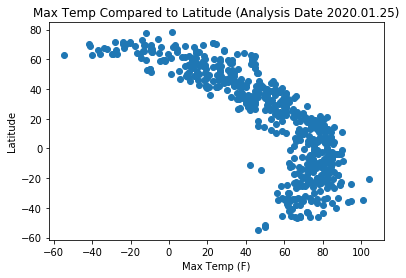

In [8]:
xTemp = cityDF["Max Temp"]
yLat = cityDF["Lat"]

plt.scatter(xTemp, yLat)
plt.title("Max Temp Compared to Latitude (Analysis Date 2020.01.25)")
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")
plt.savefig("output_data/MaxTemp_Lat")

The above code is looking at the Max Temp column for each city in the cities DataFrame and comparing it to the lattitude of the corresponding city.  It seems like cities near the equator appear to have a higher temperature than cities near the north or south poles.

#### Latitude vs. Humidity Plot

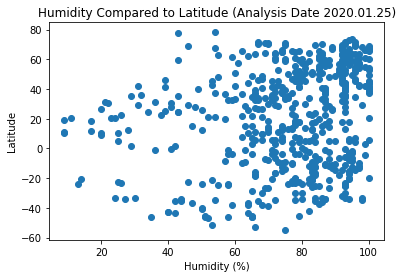

In [9]:
xHum = cityDF["Humidity"]
#using same yLat as above

plt.scatter(xHum, yLat)
plt.title("Humidity Compared to Latitude (Analysis Date 2020.01.25)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.savefig("output_data/Humidity_Lat")

The above code is looking at the humidity percent for each city and comparing it to it's lattitude.  It seems fairly scattered and just eyeballing the graph, it just seems like most of the cities tend to have humidity that's above 50%.

#### Latitude vs. Cloudiness Plot

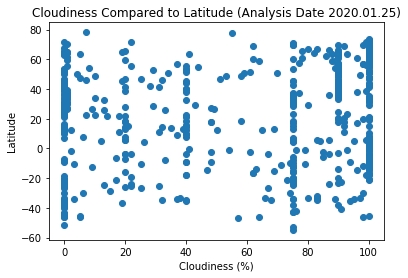

In [10]:
xCloud = cityDF["Cloudiness"]
#using same yLat as above

plt.scatter(xCloud, yLat)
plt.title("Cloudiness Compared to Latitude (Analysis Date 2020.01.25)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.savefig("output_data/Cloudiness_Lat")

The above code is comparing the percent cloudiness of the cities with their lattitude.  At face value it seems like most of the cloudiness percentages are divisible by 5 or 10, and not many seem to be as diverse as say the Max Temp values which makes me curious on the metric used to measure cloudiness. And after a quick google search it appears that cloudiness is measured in Oktas, which sort of breakdown the cloudiness into quarters to see how much of the sky is covered, so it makes sense that most of the data would be divisible by 5s or 10s as it's measured with a parameter that's divisible by 5s (25% or 75%) and 10s( 50% or 100%).

#### Latitude vs. Wind Speed Plot

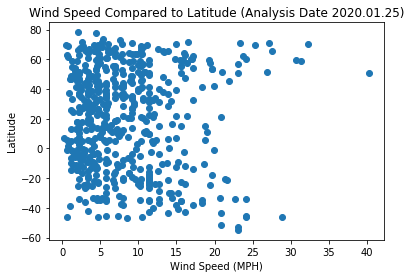

In [11]:
xWindSp = cityDF["Wind Speed"]
#using same yLat as above

plt.scatter(xWindSp, yLat)
plt.title("Wind Speed Compared to Latitude (Analysis Date 2020.01.25)")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Latitude")
plt.savefig("output_data/WindSpeed_Lat")

The above graph compares the MPH Wind Speed with the city's lattitude.  Having never really thought about wind speed, it's interesting to see that most cities have a wind speed of 15 mph or less, regardless of there position on the equator. And after doing a quick google search and finding a usatoday article, it appears that 30 mph is when a wind advisory takes affect, so it makes sense that most places would have a low wind speed as wind advisory's (at least in Minneapolis) aren't frequent.

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    x=x_values.mean()-5 #just trying to come up with a good way to get x&y so the equation will show up nicely on the graph.
    y=y_values.mean()+5
    plt.annotate(line_eq, (x,y),fontsize=15,color="red")

In [13]:
# Create Northern and Southern Hemisphere DataFrames

northernCityDF = cityDF.loc[cityDF["Lat"]>=0]
southernCityDF = cityDF.loc[cityDF["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

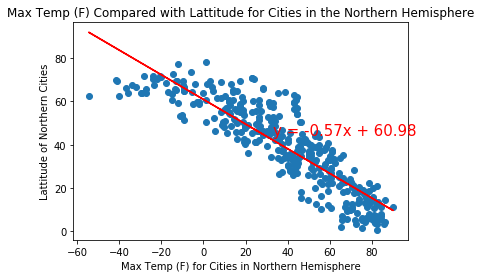

In [14]:
xNTemp = northernCityDF["Max Temp"]
yNLat = northernCityDF["Lat"]

linreg(xNTemp,yNLat)
plt.title("Max Temp (F) Compared with Lattitude for Cities in the Northern Hemisphere")
plt.xlabel("Max Temp (F) for Cities in Northern Hemisphere")
plt.ylabel("Lattitude of Northern Cities")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

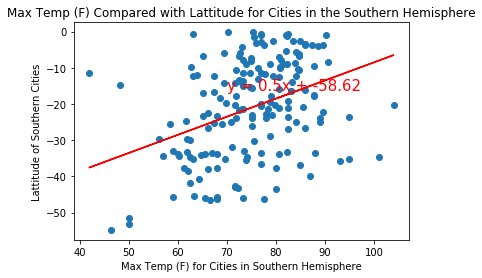

In [15]:
xSTemp = southernCityDF["Max Temp"]
ySLat = southernCityDF["Lat"]

linreg(xSTemp, ySLat)
plt.title("Max Temp (F) Compared with Lattitude for Cities in the Southern Hemisphere")
plt.xlabel("Max Temp (F) for Cities in Southern Hemisphere")
plt.ylabel("Lattitude of Southern Cities")
plt.show()

The graph showing Northern Hemisphere compared with temp shows that as the lattitude gets higher, closer to the North Pole, the temperature gets colder.  Which is mirrored in the Southern Hemisphere graph, which shows that as the city gets a lower lattitude, towards the South Pole, it gets colder. Which demonstrates that the North and South Poles are colder than the equator. There appears to be a strong correlation on both the Nothern Hemisphere graph as well as the Southern Hemisphere graph.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

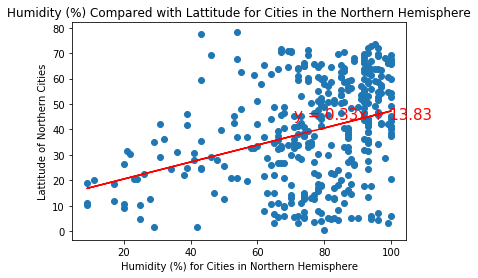

In [16]:
xNHum = northernCityDF["Humidity"]

linreg(xNHum, yNLat)
plt.title("Humidity (%) Compared with Lattitude for Cities in the Northern Hemisphere")
plt.xlabel("Humidity (%) for Cities in Northern Hemisphere")
plt.ylabel("Lattitude of Northern Cities")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

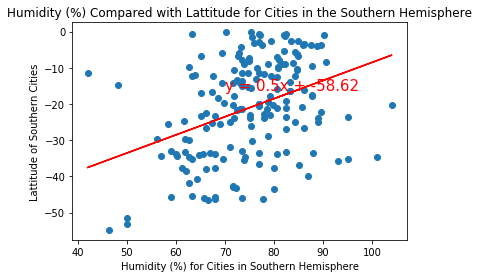

In [17]:
xSTemp = southernCityDF["Max Temp"]

linreg(xSTemp, ySLat)
plt.title("Humidity (%) Compared with Lattitude for Cities in the Southern Hemisphere")
plt.xlabel("Humidity (%) for Cities in Southern Hemisphere")
plt.ylabel("Lattitude of Southern Cities")
plt.show()

The Northern Hemisphere graph shows a weak correlation that as the city has a higher lattitude, the humidity is lower. The Southern Hemisphere graph shows a slightly stronger correlation that the Northern Hemisphere graph that as the city's lattitude becomes more south, the humidity decreases.  Both these graphs together seem to show that cities closer to the equator have a higher humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

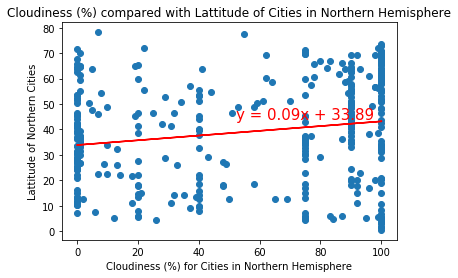

In [18]:
xNCloud = northernCityDF["Cloudiness"]

linreg(xNCloud, yNLat)
plt.title("Cloudiness (%) compared with Lattitude of Cities in Northern Hemisphere")
plt.xlabel("Cloudiness (%) for Cities in Northern Hemisphere")
plt.ylabel("Lattitude of Northern Cities")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

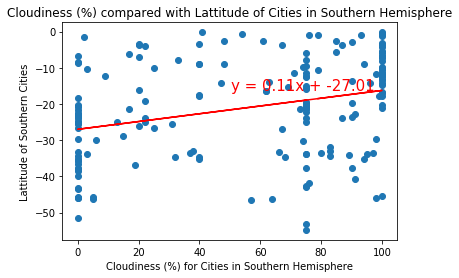

In [19]:
xSCloud = southernCityDF["Cloudiness"]

linreg(xSCloud, ySLat)
plt.title("Cloudiness (%) compared with Lattitude of Cities in Southern Hemisphere")
plt.xlabel("Cloudiness (%) for Cities in Southern Hemisphere")
plt.ylabel("Lattitude of Southern Cities")
plt.show()

Both the Nothern and Southern Hemisphere graphs have a week correlation. The Northern Hemisphere graph shows that cities with a higher lattitude might be a little more cloudy and the Southern Hemisphere graph shows that cities that are further south have a little less cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

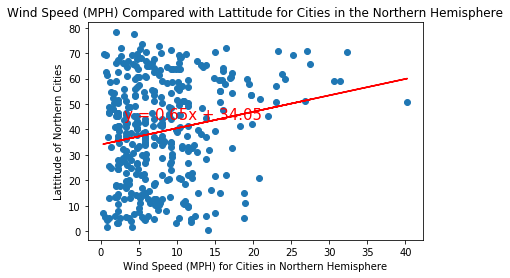

In [20]:
xNWindSp = northernCityDF["Wind Speed"]

linreg(xNWindSp, yNLat)
plt.title("Wind Speed (MPH) Compared with Lattitude for Cities in the Northern Hemisphere")
plt.xlabel("Wind Speed (MPH) for Cities in Northern Hemisphere")
plt.ylabel("Lattitude of Northern Cities")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

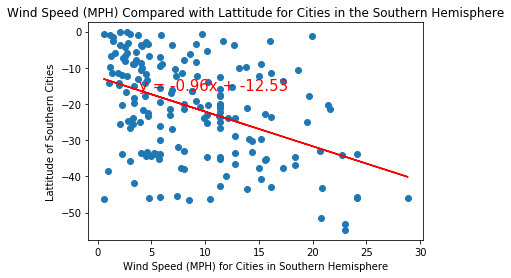

In [21]:
xSWindSp = southernCityDF["Wind Speed"]

linreg(xSWindSp, ySLat)
plt.title("Wind Speed (MPH) Compared with Lattitude for Cities in the Southern Hemisphere")
plt.xlabel("Wind Speed (MPH) for Cities in Southern Hemisphere")
plt.ylabel("Lattitude of Southern Cities")
plt.show()

The Wind Speed graph for the Northern Hemisphere has a slighty lower correlation than the Wind Speed for the Southern Hemisphere. The Northern graph shows that as the cities get more northern, the wind speed gets faster.  The Southern graph shows that as the city gets further south ther wind speed gets faster as well. Showing that wind speeds near the equarter are slower than wind speeds near the poles.